In [3]:
from minisom import MiniSom

import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
%matplotlib inline

In [4]:
data = np.genfromtxt('iris.csv', delimiter=',', usecols=(0, 1, 2, 3))
# data normalization
data = np.apply_along_axis(lambda x: x/np.linalg.norm(x), 1, data)

# Initialization and training
som = MiniSom(7, 7, 4, sigma=1.0, learning_rate=0.5)
som.random_weights_init(data)
print("Training...")
som.train_random(data, 100)  # random training
print("\n...ready!")
data.shape

Training...

...ready!


(150, 4)

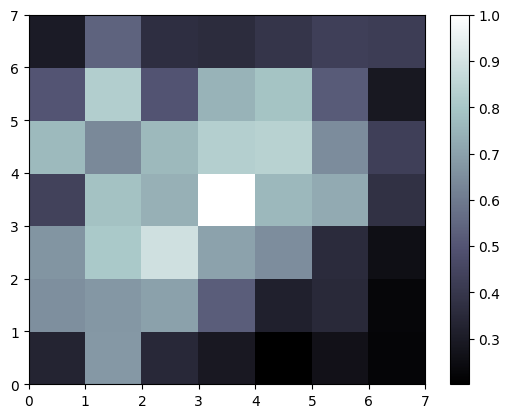

In [5]:
# Plotting the response for each pattern in the iris dataset
plt.bone()
plt.pcolor(som.distance_map().T)  # plotting the distance map as background
plt.colorbar()

In [6]:
target = np.genfromtxt('iris.csv', delimiter=',', usecols=(4), dtype=str)
t = np.zeros(len(target), dtype=int)
t[target == 'Iris-setosa'] = 0
t[target == 'Iris-versicolor'] = 1
t[target == 'Iris-virginica'] = 2

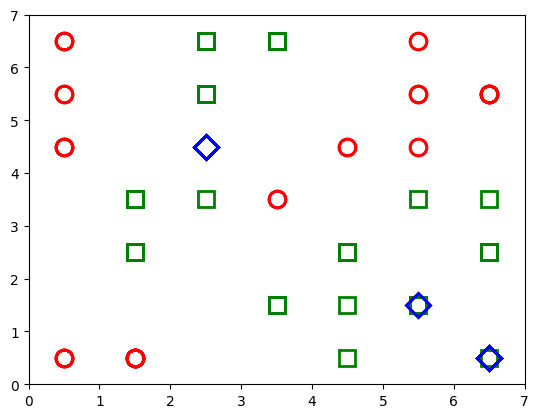

In [7]:
# use different colors and markers for each label
markers = ['o', 's', 'D']
colors = ['r', 'g', 'b'] # (red,iris-setosa),(green,iris-versicolor),(blue,iris-virginica)
for cnt, xx in enumerate(data):
    w = som.winner(xx)  # getting the winner
    # palce a marker on the winning position for the sample xx
    plt.plot(w[0]+.5, w[1]+.5, markers[t[cnt]], markerfacecolor='None',
             markeredgecolor=colors[t[cnt]], markersize=12, markeredgewidth=2)
    #print(t[cnt])
plt.axis([0, 7, 0, 7])

#colors = ('red' , 'green', 'blue')
#markers = ('Iris-setosa','Iris-versicolor','Iris-virginica')

#plt.legend(colors, markers)
plt.show()